In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset exploration

https://www.kaggle.com/datasnaek/chess

In [2]:
df = pd.read_csv('chess-matches.csv')
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


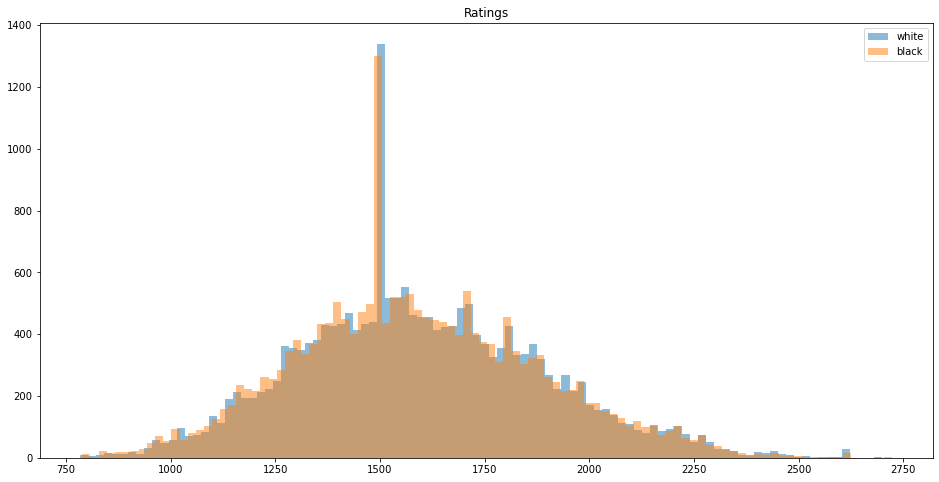

In [70]:
plt.figure(figsize=(16, 8))

plt.title("Ratings")
_ = plt.hist(df['white_rating'].values, bins=100, alpha=0.5, label='white')
_ = plt.hist(df['black_rating'].values, bins=100, alpha=0.5, label='black')
_ = plt.legend()

<AxesSubplot:>

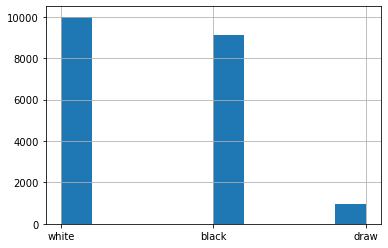

In [18]:
df['winner'].hist()

In [35]:
rated_games_df = df[df['rated'] == True]

white_winner_df = rated_games_df[rated_games_df['winner'] == 'white']
black_winner_df = rated_games_df[rated_games_df['winner'] == 'black']
draw_df = rated_games_df[rated_games_df['winner'] == 'draw']

min_rating = min(df['white_rating'].min(), df['black_rating'].min())
max_rating = max(df['white_rating'].max(), df['black_rating'].max())

In [65]:
def plot_ratings(dataframe, title):
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    x = dataframe['white_rating'].values
    y = dataframe['black_rating'].values

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    fig = plt.figure(figsize=(16, 16))

    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)

    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)
    ax.set_xlim(min_rating * 0.9, max_rating)
    ax.set_ylim(min_rating * 0.9, max_rating)
    ax.set_xlabel('white rating')
    ax.set_ylabel('black rating')

    ax_histx.hist(x, bins=100)
    ax_histy.hist(y, bins=100, orientation='horizontal')
    
    plt.title(title)
    plt.show()

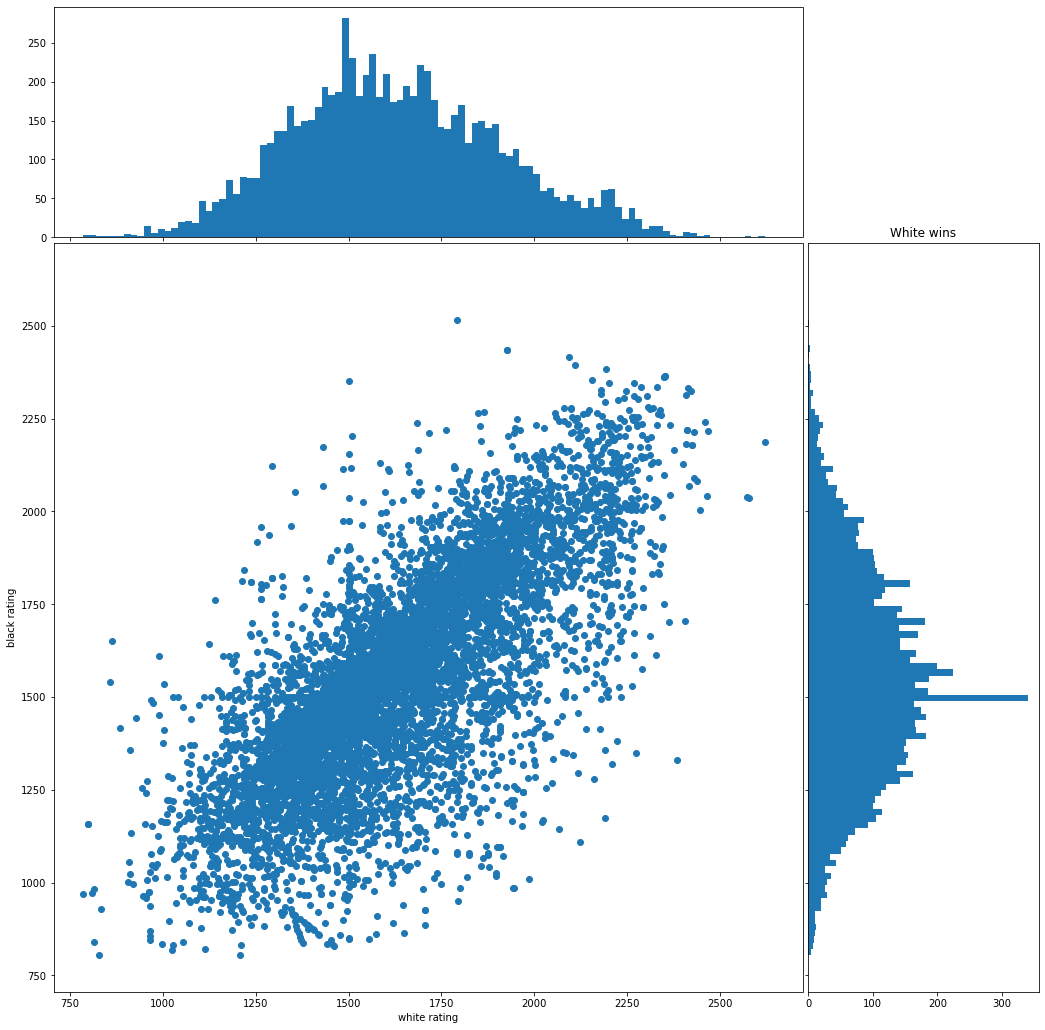

In [66]:
plot_ratings(white_winner_df, 'White wins')

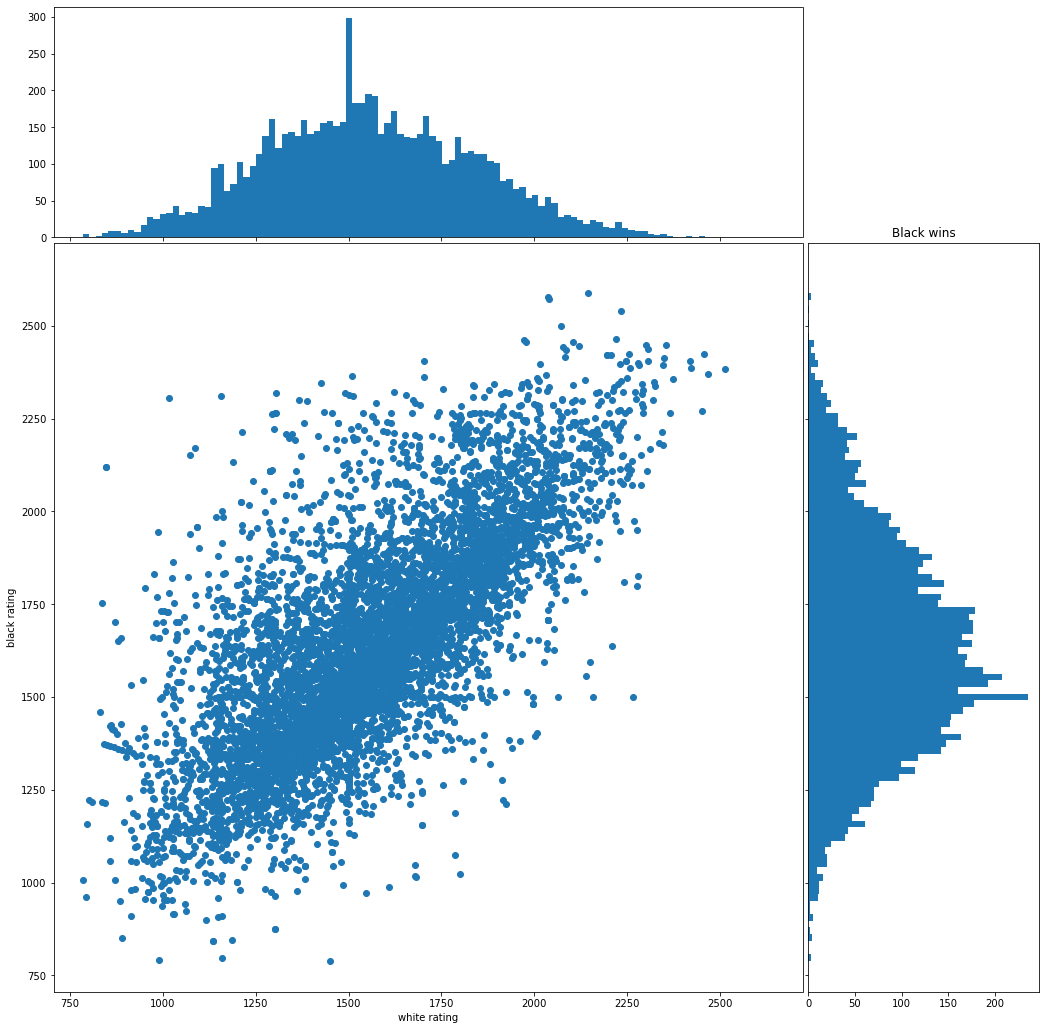

In [67]:
plot_ratings(black_winner_df, 'Black wins')

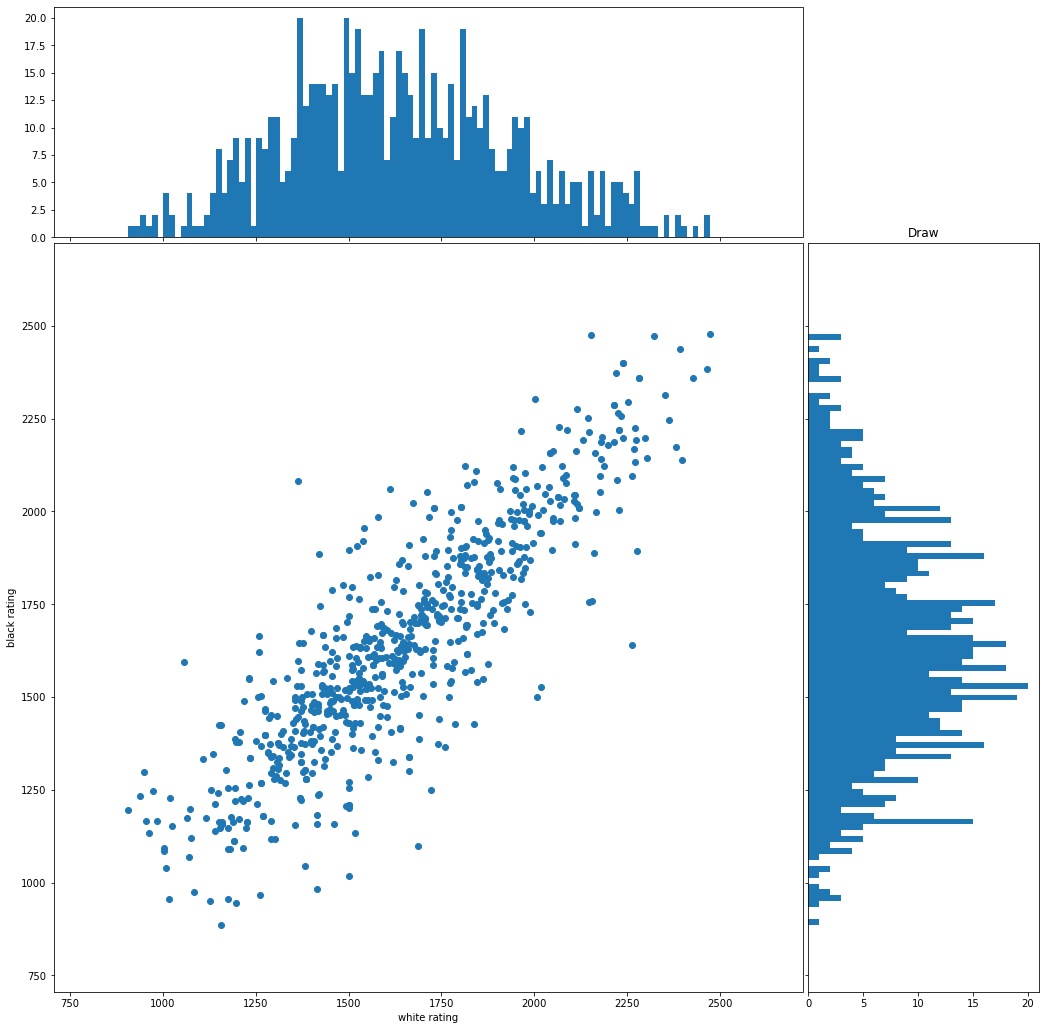

In [68]:
plot_ratings(draw_df, 'Draw')